Mayatnikning tebranish davri: 2.01 soniya


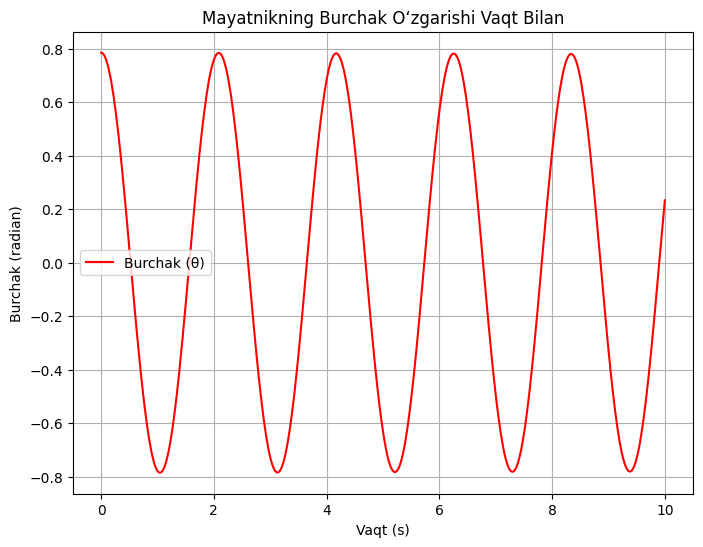

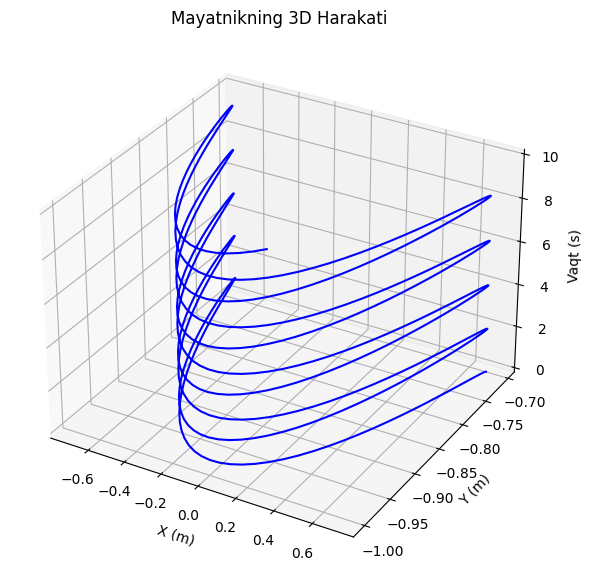

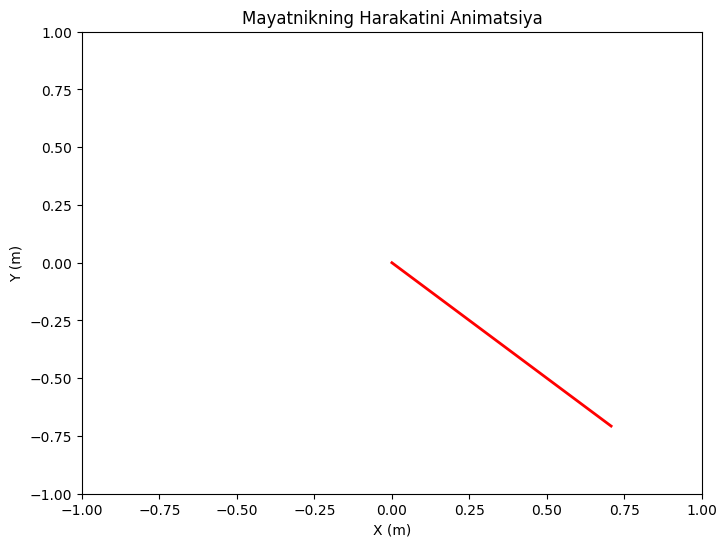


Tahlil:
1. Mayatnikning tebranish davri massaga bog‘liq emas, faqat uzunlik (L) va gravitatsion tezlikka (g) bog‘liq.
2. Animatsiya orqali mayatnikning tebranishining real va vizual ifodalangan harakatini ko‘rish mumkin.


In [1]:
# 1. Kutubxonalarni import qilish
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import scipy.integrate as integrate

# 2. Ma'lumotlar tayyorlash
L = 1.0  # Mayatnik uzunligi (m)
g = 9.81  # Gravitatsion tezlik (m/s²)
theta0 = np.pi / 4  # Boshlang‘ich burchak (radianlarda)

# 3. Mayatnikning tebranish davrini hisoblash
T = 2 * np.pi * np.sqrt(L / g)
print(f"Mayatnikning tebranish davri: {T:.2f} soniya")

# 4. Mayatnikning harakati (Differensial tenglama)
def pendulum_eq(t, y):
    θ, ω = y
    dydt = [ω, -(g / L) * np.sin(θ)]  # θ va ω ni hisoblash
    return dydt

# Boshlang‘ich shartlar
y0 = [theta0, 0]  # Boshlang‘ich burchak va burchak tezligi
t = np.linspace(0, 10, 500)  # Vaqt oralig‘i

# Mayatnikning harakatini yechish
sol = integrate.solve_ivp(pendulum_eq, [t[0], t[-1]], y0, t_eval=t)

# 5. 2D graﬁk: Mayatnikning harakatini ko‘rsatish
plt.figure(figsize=(8, 6))
plt.plot(t, sol.y[0], label="Burchak (θ)", color='r')
plt.title("Mayatnikning Burchak O‘zgarishi Vaqt Bilan")
plt.xlabel("Vaqt (s)")
plt.ylabel("Burchak (radian)")
plt.grid(True)
plt.legend()
plt.show()

# 6. 3D graﬁk: Mayatnikning harakati va gravitatsion kuchni ko‘rsatish
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Mayatnikning X va Y koordinatalarini hisoblash
x = L * np.sin(sol.y[0])
y = -L * np.cos(sol.y[0])

# 3D graﬁk yaratish
ax.plot3D(x, y, t, color='b')
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Vaqt (s)")
ax.set_title("Mayatnikning 3D Harakati")
plt.show()

# 7. Animatsiya: Mayatnikning harakatini ko‘rsatish
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], 'r-', lw=2)
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
ax.set_title("Mayatnikning Harakatini Animatsiya")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")

# Animatsiya uchun yangilash funksiyasi
def update(frame):
    x_pos = L * np.sin(sol.y[0][frame])  # X koordinatasi
    y_pos = -L * np.cos(sol.y[0][frame])  # Y koordinatasi
    line.set_data([0, x_pos], [0, y_pos])  # Harakatni yangilash
    return line,

# Animatsiya yaratish
ani = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
plt.show()

# 8. Natijalarni tahlil qilish
print("\nTahlil:")
print(f"1. Mayatnikning tebranish davri massaga bog‘liq emas, faqat uzunlik (L) va gravitatsion tezlikka (g) bog‘liq.")
print(f"2. Animatsiya orqali mayatnikning tebranishining real va vizual ifodalangan harakatini ko‘rish mumkin.")
